# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def dice(faces,trows):
    lst = [i+1 for i in range(faces)]  
    info = [random.choice(lst) for i in range(trows)]
    return info

  
x1 = dice(6,10)
x1 

[4, 5, 4, 3, 4, 2, 6, 4, 1, 6]

#### 2.- Plot the results sorted by value.

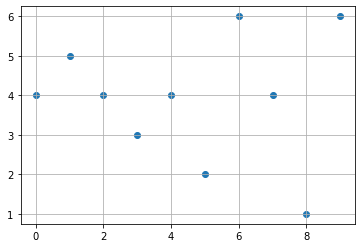

In [3]:
# your code here
tirada = range(10)

plt.scatter(tirada,x1)
plt.grid()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

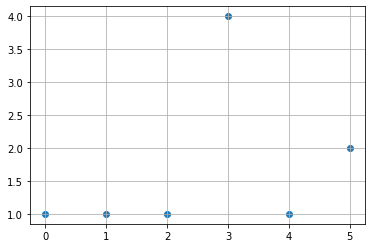

In [6]:
# your code here

# Group the statistical data
lst = [[] for i in set(x1)]
for i in x1:
    for j in range(len(set(x1))):
        if i == list(set(x1))[j]:
            lst[j].append(i)
    
# Calculating the frecuencies
lst_freq = []
for i in lst:
    lst_freq.append(len(i))
    
# Plotting    
plt.scatter(range(len(lst_freq)),lst_freq)
plt.grid()   


In [ ]:
"""
your comments here
"""
# first one is the ditribution of value 
#and the second one is the distribution of the amount of times that the same value repeat

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(ob_lst):
    mean = sum(ob_lst)/len(ob_lst)
    return mean


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
print("The mean of the values is:",mean(x1))
print("The mean of the frequencies is:",mean(lst_freq))

The mean of the values is: 3.9
The mean of the frequencies is: 1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here

def median(lst):
    for i in range(len(lst)):
        if (len(lst) % 2) == 0: # even
            if i==(len(lst))/2:
                return i
            else:
                if i ==(len(lst)+1)/2: # odd
                    return i


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# https://es.wikipedia.org/wiki/Cuartil
# your code here

def Quartiles(lst):
    I=[[] for i in range(2)]
    Q=[[] for i in range(4)]
    for i in lst:
        if i < median(lst):
            I[0].append(i)
        elif i > median(lst):
            I[1].append(i)
    for j in I[0]:
        if j < median(I[0]):
            Q[0].append(j)
        elif j > median(I[0]):
            Q[1].append(j)
    for j in I[1]:
        if j < median(I[1]):
            Q[2].append(j)
        elif j > median(I[1]):
            Q[3].append(j)
    return Q

#Quartiles(x1), Revisar con clama, Funciona con cantidade grandes

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [12]:
#https://stackoverflow.com/questions/57584412/pandas-read-csv-not-reading-a-file-properly-not-splitting-into-proper-columns
# your code here

df = pd.read_csv('../data/roll_the_dice_hundred.csv')

df

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [ ]:
"""
your comments here
"""

# I see 100 rolls of a dice

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
lst100=list(df['value'])

print("The mean of the values of hundred dice rolls:",mean(lst100))

The mean of the values of hundred dice rolls: 3.74


#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here

def Freq(ob_lst):
# Group the statistical data
    lst = [[] for i in set(ob_lst)]
    for i in ob_lst:
        for j in range(len(set(ob_lst))):
            if i == list(set(ob_lst))[j]:
                lst[j].append(i)
# Calculating the frecuencies
    lst_freq = []
    for i in lst:
        lst_freq.append(len(i))
    return lst_freq

Freq(lst100)


# Plotting    
#plt.scatter(range(len(lst_freq)),lst_freq)
#plt.grid() 

[12, 17, 14, 22, 12, 23]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

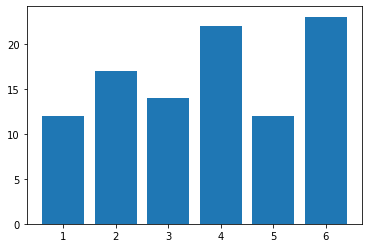

In [20]:
# your code here

y=Freq(lst100)
x=list(set(lst100))


plt.bar(x, y)
#plt.show()

In [ ]:
"""
your comments here
"""
# Some values have repeat more times than others but the trend is uniform

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<BarContainer object of 6 artists>

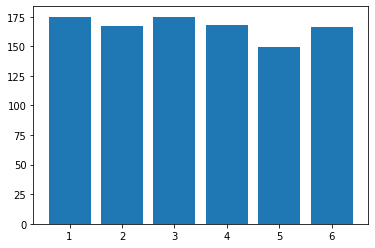

In [22]:
# your code here
df_2 = pd.read_csv('../data/roll_the_dice_thousand.csv')

lst1000=list(df_2['value'])

y=Freq(lst1000)
x=list(set(lst1000))


plt.bar(x, y)


In [ ]:
"""
your comments here
"""
# with 1000 rolls we can appreciate better the uniform trend

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<BarContainer object of 72 artists>

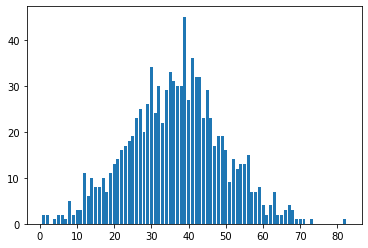

In [23]:
# your code here
df_3 = pd.read_csv('../data/ages_population.csv')

ob_lst=list(df_3['observation'])

y=Freq(ob_lst)
x=list(set(ob_lst))


plt.bar(x, y)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
# your code here
mu=mean(ob_lst)
sigma=np.std(ob_lst)

print("The mean is:",mu,"and the statndard deviation is:",sigma)

The mean is: 36.56 and the statndard deviation is: 12.810089773299795


In [ ]:
"""
your comments here
"""
# Yes

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<BarContainer object of 18 artists>

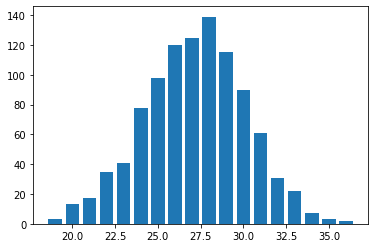

In [25]:
# your code here
df_4 = pd.read_csv('../data/ages_population2.csv')



ob_lst2=list(df_4['observation'])

y=Freq(ob_lst2)
x=list(set(ob_lst2))


plt.bar(x, y)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""
# The pattern of distribution is the same (Normal) but this time there are less bins

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [26]:
# your code here

mu2=mean(ob_lst2)
sigma2=np.std(ob_lst2)

print("The mean is:",mu2,"and the statndard deviation is:",sigma2)

The mean is: 27.155 and the statndard deviation is: 2.9683286543103677


In [ ]:
"""
your comments here
"""

# The mean is lowwer
# and the standar deviation is a 10 percent of the previous one

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<BarContainer object of 75 artists>

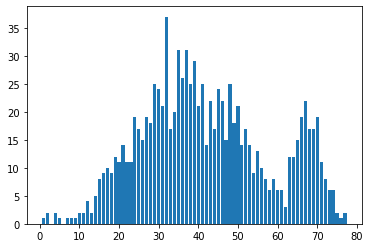

In [27]:
# your code here
df_5 = pd.read_csv('../data/ages_population3.csv')

ob_lst3=list(df_5['observation'])

y=Freq(ob_lst3)
x=list(set(ob_lst3))


plt.bar(x, y)


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here
mu3=mean(ob_lst3)
sigma3=np.std(ob_lst3)

print("The mean is:",mu3,"and the statndard deviation is:",sigma3)

The mean is: 41.989 and the statndard deviation is: 16.13663158778808


In [ ]:
"""
your comments here
"""
# both (statndard deviation and the mean) are bigger, but this time we can see a second bell of distribution

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here

Quartiles(ob_lst3) # Los cuartiles al parecer estan mal


[[21.0,
  21.0,
  24.0,
  31.0,
  54.0,
  52.0,
  37.0,
  69.0,
  36.0,
  30.0,
  64.0,
  30.0,
  76.0,
  73.0,
  42.0,
  52.0,
  67.0,
  28.0,
  24.0,
  50.0,
  70.0,
  57.0,
  20.0,
  27.0,
  51.0,
  67.0,
  56.0,
  30.0,
  52.0,
  44.0,
  49.0,
  31.0,
  64.0,
  65.0,
  32.0,
  37.0,
  37.0,
  18.0,
  65.0,
  42.0,
  45.0,
  40.0,
  66.0,
  72.0,
  43.0,
  64.0,
  43.0,
  54.0,
  48.0,
  30.0,
  35.0,
  41.0,
  17.0,
  44.0,
  32.0,
  37.0,
  45.0,
  41.0,
  23.0,
  45.0,
  69.0,
  36.0,
  47.0,
  31.0,
  33.0,
  51.0,
  27.0,
  20.0,
  15.0,
  26.0,
  28.0,
  67.0,
  36.0,
  54.0,
  17.0,
  51.0,
  75.0,
  41.0,
  29.0,
  55.0,
  37.0,
  63.0,
  42.0,
  49.0,
  32.0,
  39.0,
  46.0,
  50.0,
  32.0,
  43.0,
  45.0,
  26.0,
  22.0,
  15.0,
  26.0,
  24.0,
  71.0,
  55.0,
  68.0,
  35.0,
  40.0,
  55.0,
  21.0,
  60.0,
  41.0,
  22.0,
  34.0,
  30.0,
  56.0,
  61.0,
  51.0,
  33.0,
  47.0,
  48.0,
  26.0,
  30.0,
  56.0,
  42.0,
  66.0,
  50.0,
  57.0,
  12.0,
  20.0,
  69.0,
  47.0,


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""